Task 5 – Pivot Table + Stack/Unstack:

In [3]:
import pandas as pd
# Đọc dữ liệu từ file CSV:
df_patient = pd.read_csv("../data_clean/patient_info_clean.csv")
df_reaction = pd.read_csv("../data_clean/reaction_log_clean.csv")
df_vaccine = pd.read_csv("../data_clean/vaccination_record_clean.csv")

1. Tạo pivot tổng số liều tiêm theo nhóm tuổi × vaccine_type:

In [5]:
patients_vaccines = pd.merge(
    df_patient,
    df_vaccine,
    on="patient_id",
    how="left",
    indicator="merge_patient_vaccine"
)

sum_of_doses = pd.pivot_table(
    patients_vaccines,          # ✅ đúng DataFrame
    index='age_group',
    columns='vaccine_type',
    values='dose_number',
    aggfunc='count',
    fill_value=0
)

# Sắp xếp thứ tự nhóm tuổi
age_sort = ['0-5', '6-17', '18-49', '50+']
pivot_sum_doses = sum_of_doses.reindex(age_sort)

print("\nBảng pivot tổng số liều tiêm theo nhóm tuổi × vaccine_type:")
print(pivot_sum_doses)



Bảng pivot tổng số liều tiêm theo nhóm tuổi × vaccine_type:
vaccine_type  Covid-19  DPT  MMR
age_group                       
0-5                  1    5    6
6-17                17    6    9
18-49               14    9   12
50+                 10   12    5


2. Tạo pivot mức độ phản ứng trung bình theo vaccine_type × age_group:

In [7]:
import pandas as pd
import numpy as np
final_df = pd.merge(
    patients_vaccines,
    df_reaction,
    on="patient_id",
    how="left",
    indicator="merge_reaction"

)

pivot_avg_reaction = pd.pivot_table(
    final_df,
    index='vaccine_type',
    columns='age_group',
    values='severity',
    aggfunc='mean'
)
# Sắp xếp thứ tự nhóm tuổi:
age_sort = ['0-5', '6-17', '18-49', '50+']
pivot_avg_reaction = pivot_avg_reaction.reindex(columns=age_sort)
print("\n Bảng pivot mức độ phản ứng trung bình theo vaccine_type × age_group: ")
print(pivot_avg_reaction.round(2))


 Bảng pivot mức độ phản ứng trung bình theo vaccine_type × age_group: 
age_group      0-5  6-17  18-49   50+
vaccine_type                         
Covid-19      1.00  1.26   1.70  1.48
DPT           1.29  1.12   1.71  1.61
MMR           2.17  1.88   1.55  1.09


3. Thực hành stack/unstack trên bảng kết quả:

3.1. Bảng tổng số liều tiêm theo nhóm tuổi × vaccine_type:
vaccine_type  COVID-19  DPT  MMR
age_group                       
0-5                  3    5    6
18-49               16   10   13
50+                 11   14    6
6-17                18    7   11

3.1.1. Stack() :

In [8]:
# Chuyển từ Dataframe có chỉ mục thông thường thành Series có multiply index:
stacked1 = sum_of_doses.stack()
stacked1


age_group  vaccine_type
0-5        Covid-19         1
           DPT              5
           MMR              6
18-49      Covid-19        14
           DPT              9
           MMR             12
50+        Covid-19        10
           DPT             12
           MMR              5
6-17       Covid-19        17
           DPT              6
           MMR              9
dtype: int64

In [9]:
# Chuyển từ multiply index thành bảng thường:
dataframe1 = stacked1.reset_index()
dataframe1.columns = ['age_group', 'vaccine_type', 'total_doses']
dataframe1

,age_group,vaccine_type,total_doses
0,0-5,Covid-19,1
1,0-5,DPT,5
2,0-5,MMR,6
3,18-49,Covid-19,14
4,18-49,DPT,9
5,18-49,MMR,12
6,50+,Covid-19,10
7,50+,DPT,12
8,50+,MMR,5
9,6-17,Covid-19,17


3.1.2. Unstack() :

In [11]:
# Chuyển từ Series đa cấp thành Dataframe thông thường:
unstacked1 = stacked1.unstack()
unstacked1



vaccine_type,Covid-19,DPT,MMR
age_group,,,
0-5,1,5,6
18-49,14,9,12
50+,10,12,5
6-17,17,6,9


In [12]:
# Đổi chiều bảng:
pivot_swapped1 = stacked1.unstack(level=0)
pivot_swapped1

age_group,0-5,18-49,50+,6-17
vaccine_type,,,,
Covid-19,1,14,10,17
DPT,5,9,12,6
MMR,6,12,5,9


3.2. Bảng mức độ phản ứng trung bình theo vaccine_type × age_group:
age_group      0-5  6-17  18-49   50+
vaccine_type                         
COVID-19      1.00  1.44   1.71  1.52
DPT           1.44  1.36   1.74  1.68
MMR           2.15  1.90   1.59  1.29

3.2.1. Stack() :

In [13]:
# Chuyển từ Dataframe có chỉ mục thông thường thành Series có multiply index:
stacked2 = pivot_avg_reaction.stack()
stacked2


vaccine_type  age_group
Covid-19      0-5          1.000000
              6-17         1.263158
              18-49        1.696970
              50+          1.478261
DPT           0-5          1.285714
              6-17         1.125000
              18-49        1.708333
              50+          1.606061
MMR           0-5          2.166667
              6-17         1.882353
              18-49        1.548387
              50+          1.090909
dtype: float64

In [14]:
# Chuyển từ multiply index thành bảng thường:
dataframe2 = stacked2.reset_index()
dataframe2.columns = ['vaccine_type', 'age_group', 'avg_reaction']
dataframe2

,vaccine_type,age_group,avg_reaction
0,Covid-19,0-5,1.000000
1,Covid-19,6-17,1.263158
2,Covid-19,18-49,1.696970
3,Covid-19,50+,1.478261
4,DPT,0-5,1.285714
5,DPT,6-17,1.125000
6,DPT,18-49,1.708333
7,DPT,50+,1.606061
8,MMR,0-5,2.166667
9,MMR,6-17,1.882353


3.2.2. Unstack() :

In [15]:
# Chuyển từ Series đa cấp thành Dataframe thông thường:
unstacked2 = stacked2.unstack()
unstacked2



age_group,0-5,6-17,18-49,50+
vaccine_type,,,,
Covid-19,1.000000,1.263158,1.696970,1.478261
DPT,1.285714,1.125000,1.708333,1.606061
MMR,2.166667,1.882353,1.548387,1.090909


In [16]:
# Đổi chiều bảng:
pivot_swapped2 = stacked2.unstack(level=0)
pivot_swapped2

vaccine_type,Covid-19,DPT,MMR
age_group,,,
0-5,1.000000,1.285714,2.166667
6-17,1.263158,1.125000,1.882353
18-49,1.696970,1.708333,1.548387
50+,1.478261,1.606061,1.090909


4. Tạo pivot đa cấp (MultiIndex) để thống kê số bệnh nhân, số lần tiêm và tỷ lệ có phản ứng 
trong cùng một bảng tổng hợp:

In [19]:
# Tạo cột “có phản ứng hay không” :
#Có phản ứng = reaction_type không rỗng và ≠ "Không phản ứng" :
final_df = pd.merge(
    patients_vaccines,
    df_reaction,
    on="patient_id",
    how="left",
    indicator="merge_reaction"

)
final_df['has_reaction'] = (
    final_df['reaction_type']
    .fillna('')
    .str.strip()
    .str.lower()
    .ne('không phản ứng')
)


# Groupby và tính các chỉ số:
summary= (
    final_df
    .groupby(['vaccine_type', 'age_group'])
    .agg(
# Số bệnh nhân:
        patients=('patient_id', 'nunique'),
# Số lần tiêm:  
        doses=('patient_id', 'count'),
# Tỉ lệ phản ứng:
        reaction_rate=('has_reaction', 'mean')
    )
)
# Pivot đa cấp:
pivot_multi= summary.unstack('age_group')
# Sắp xếp thứ tự nhóm tuổi:
age_sort = ['0-5', '6-17', '18-49', '50+']
pivot_multi = pivot_multi.reindex(age_sort, axis=1, level=1)
# Định dạng tỷ lệ %:
pivot_multi['reaction_rate'] = pivot_multi['reaction_rate'] * 100
pivot_multi = pivot_multi.round(2)
print("\n Bảng pivot đa cấp để thống kê số bệnh nhân, số lần tiêm và tỷ lệ có phản ứng: ")
print(pivot_multi)




 Bảng pivot đa cấp để thống kê số bệnh nhân, số lần tiêm và tỷ lệ có phản ứng: 
             patients                doses                reaction_rate  \
age_group         0-5 6-17 18-49 50+   0-5 6-17 18-49 50+           0-5   
vaccine_type                                                              
Covid-19            3    9     8   8     5   30    36  27         100.0   
DPT                 3    5     7   7     9   12    29  42         100.0   
MMR                 4    7     7   4    13   21    36  15         100.0   

                                   
age_group      6-17  18-49    50+  
vaccine_type                       
Covid-19      100.0  100.0  100.0  
DPT           100.0  100.0  100.0  
MMR           100.0  100.0  100.0  


Biểu đồ cột nhóm:

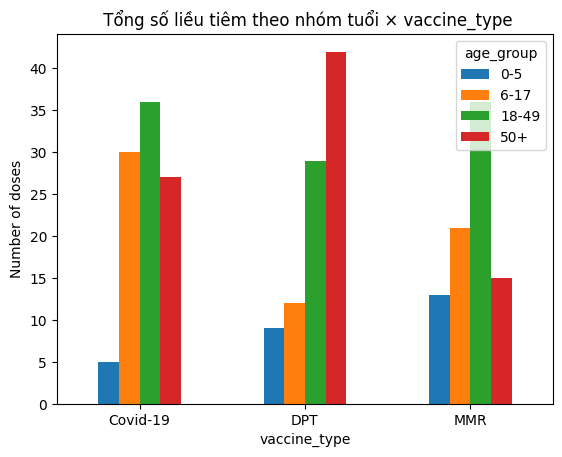

<Figure size 640x480 with 0 Axes>

In [20]:
from matplotlib import pyplot as plt
pivot_multi['doses'].plot(kind='bar')
plt.ylabel('Number of doses')
plt.title(' Tổng số liều tiêm theo nhóm tuổi × vaccine_type')
plt.xticks(rotation=0)
plt.show()
plt.savefig('total_doses_by_agegroup_vaccinetype.png')


Biểu đồ đường:

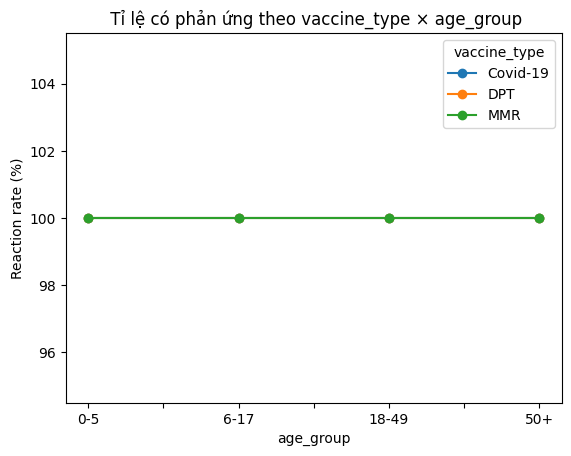

<Figure size 640x480 with 0 Axes>

In [21]:
pivot_multi['reaction_rate'].T.plot(marker='o')
plt.ylabel('Reaction rate (%)')
plt.title(' Tỉ lệ có phản ứng theo vaccine_type × age_group')
plt.show()
plt.savefig('reaction_rate_by_vaccinetype_agegroup.png')
